<a href="https://colab.research.google.com/github/Shamiso-Tirivanhu/Customer-Segmentation-Using-K-Mean-Clusterings/blob/main/Customer_Segmentation_Using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
# Load the Data
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
# Data Collection and Analysis
customer_data =pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Find the number of rows in dataset
customer_data.shape

(200, 5)

In [5]:
# Getting information on the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Missing values in the dataset
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
# Choosing the Annual Income Column & Spending Score column
X = customer_data.iloc[:,[3,4]]


In [8]:
# Checking the values we have
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [9]:
# Choosing the number of clusters
wcss = []

In [10]:
#  Finding WCSS -Within Clusters Sum of Squares for different values of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=1, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

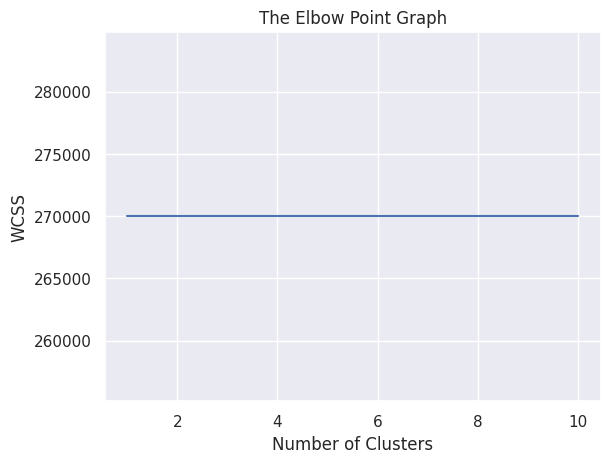

In [11]:
# Plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# The optimun number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state = 0)

# Retrun a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


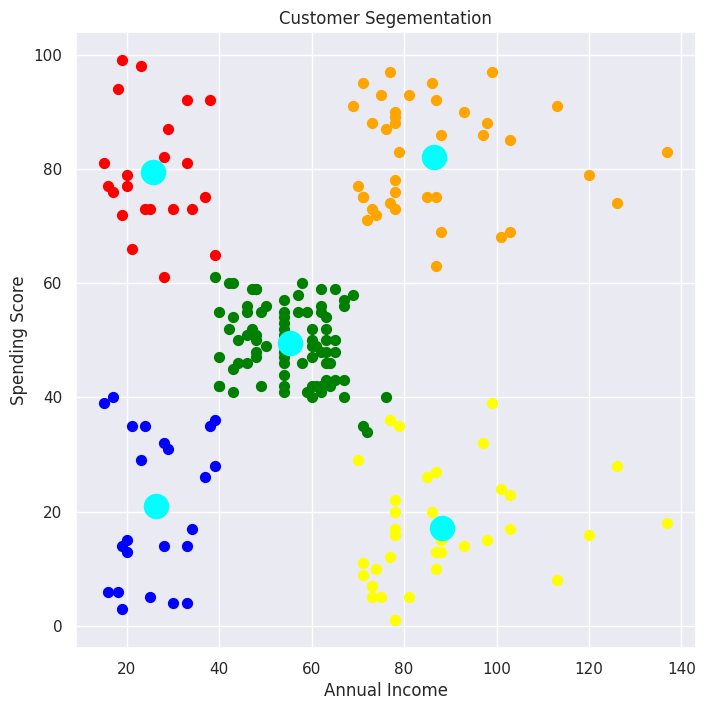

In [13]:
# @title Default title text
# Visualizing all the clusters & their ceneriods
plt.figure(figsize=(8,8))
plt.scatter(X.iloc[Y==0,0], X.iloc[Y==0,1], s=50, c='green', label ='cluster 1')
plt.scatter(X.iloc[Y==1,0], X.iloc[Y==1,1], s=50, c="orange", label ='cluster 2' )
plt.scatter(X.iloc[Y==2,0], X.iloc[Y==2,1], s=50, c="yellow", label ='cluster 3')
plt.scatter(X.iloc[Y==3,0], X.iloc[Y==3,1], s=50, c="blue", label ='cluster 4')
plt.scatter(X.iloc[Y==4,0], X.iloc[Y==4,1], s=50, c="red", label ='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='cyan', label ='Centroids')
plt.title('Customer Segementation')
plt.xlabel('Annual Income')
plt.ylabel("Spending Score")
plt.show()